<a href="https://colab.research.google.com/github/jayprakash02/optum-hackathon-csv/blob/master/optum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install matplotlib 

# Initializing Data

Load Data

In [2]:
import pandas as pd

In [3]:
patient_url='https://raw.githubusercontent.com/jayprakash02/optum-hackathon-csv/master/patients.csv'
encounter_url='https://raw.githubusercontent.com/jayprakash02/optum-hackathon-csv/master/encounters.csv'
medication_url='https://raw.githubusercontent.com/jayprakash02/optum-hackathon-csv/master/medications.csv'

In [4]:
patient_data=pd.read_csv(patient_url)
encounter_data=pd.read_csv(encounter_url)
medication_data=pd.read_csv(medication_url)

### Clean Data

Encounter

In [5]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

In [6]:
# droping columns
encounter_data.drop(columns=['ORGANIZATION','PROVIDER','CODE','PAYER','TOTAL_CLAIM_COST','PAYER_COVERAGE','BASE_ENCOUNTER_COST','REASONCODE','REASONDESCRIPTION'],inplace=True)

# encoding categorical data 
encounter_data['ENCOUNTERCLASS']=labelencoder.fit_transform(encounter_data['ENCOUNTERCLASS'])
encounter_data['DESCRIPTION']=labelencoder.fit_transform(encounter_data['DESCRIPTION'])

encounter_data['START']=pd.to_datetime(encounter_data['START'])
encounter_data['STOP']=pd.to_datetime(encounter_data['STOP'])
encounter_data['TDELTA']=(encounter_data.STOP-encounter_data.START)

In [7]:
encounter_data.head()

,Id,START,STOP,PATIENT,ENCOUNTERCLASS,DESCRIPTION,TDELTA
0,d0c40d10-8d87-447e-836e-99d26ad52ea5,2010-01-23 17:45:28+00:00,2010-01-23 18:10:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060,0,21,0 days 00:25:00
1,e88bc3a9-007c-405e-aabc-792a38f4aa2b,2012-01-23 17:45:28+00:00,2012-01-23 18:00:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060,5,25,0 days 00:15:00
2,8f104aa7-4ca9-4473-885a-bba2437df588,2001-05-01 15:02:18+00:00,2001-05-01 15:17:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,0,21,0 days 00:15:00
3,b85c339a-6076-43ed-b9d0-9cf013dec49d,2011-07-28 15:02:18+00:00,2011-07-28 15:17:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,5,25,0 days 00:15:00
4,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,2010-07-27 12:58:08+00:00,2010-07-27 13:28:08+00:00,10339b10-3cd1-4ac3-ac13-ec26728cb592,5,25,0 days 00:30:00


Medication

In [8]:
# droping columns
medication_data.drop(columns=['PAYER','CODE','BASE_COST','PATIENT','PAYER_COVERAGE','DISPENSES','TOTALCOST','REASONCODE','REASONDESCRIPTION'],inplace=True)
# encoding categorical data 
medication_data['DESCRIPTION']=labelencoder.fit_transform(medication_data['DESCRIPTION'])

medication_data.head()

medication_data['START']=pd.to_datetime(medication_data['START'])
medication_data['STOP']=pd.to_datetime(medication_data['STOP'])
medication_data['Dosage']=(medication_data.STOP-medication_data.START)
medication_data.sort_values(by=['START'],ignore_index=True,inplace=True)

In [9]:
def _delete_extra(df):
    li=[]
    for i,rows in df.iterrows():
        _curr=i
        _next=i+1 if i<len(df)-1 else i
        if _curr!=_next:
            if df.iloc[_curr].ENCOUNTER==df.iloc[_next].ENCOUNTER and df.iloc[_curr].START==df.iloc[_next].START :
                li.append(_next)
                
    return li

In [10]:
medication_data.sort_values(by=['START'],inplace=True)
li=_delete_extra(medication_data)
medication_data.drop(medication_data.index[li],inplace=True)

Patient Data

In [11]:
# droping columns
patient_data.drop(columns=['SSN','DRIVERS','PASSPORT','PREFIX','SUFFIX','BIRTHPLACE','MAIDEN','MARITAL','BIRTHPLACE','ADDRESS','STATE'],inplace=True)
# encoding categorical data 
patient_data['ETHNICITY']=labelencoder.fit_transform(patient_data['ETHNICITY'])
patient_data['GENDER']=labelencoder.fit_transform(patient_data['GENDER'])
patient_data['RACE']=labelencoder.fit_transform(patient_data['RACE'])

patient_data.head()

,Id,BIRTHDATE,DEATHDATE,FIRST,LAST,RACE,ETHNICITY,GENDER,CITY,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,José Eduardo181,Gómez206,4,0,1,Chicopee,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,Milo271,Feil794,4,1,1,Somerville,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,Jayson808,Fadel536,4,1,1,Chicopee,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,Mariana775,Rutherford999,4,1,0,Lowell,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,Gregorio366,Auer97,4,1,1,Boston,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20


## MERGING DATA

In [12]:
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [13]:
display('patient_data','encounter_data','pd.merge(patient_data,encounter_data, left_on="Id", right_on="PATIENT")')

,Id,BIRTHDATE,DEATHDATE,FIRST,LAST,RACE,ETHNICITY,GENDER,CITY,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,José Eduardo181,Gómez206,4,0,1,Chicopee,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,Milo271,Feil794,4,1,1,Somerville,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,Jayson808,Fadel536,4,1,1,Chicopee,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,Mariana775,Rutherford999,4,1,0,Lowell,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,Gregorio366,Auer97,4,1,1,Boston,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,023a7d29-32b3-4db5-89c8-b88bd7582ec0,1922-02-14,NaN,Conchita9,Peres371,0,0,0,Cambridge,Middlesex County,2141.0,42.413390,-71.102083,1622314.87,32086.31
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,1977-08-08,NaN,Laverne101,Hane680,4,1,1,Beverly,Essex County,1915.0,42.573337,-70.883400,979724.25,3130.52
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,1914-09-05,2006-05-26,Kimber624,Volkman526,4,1,0,Norwood,Norfolk County,NaN,42.211364,-71.213621,1560540.35,52391.24
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,1914-09-05,1990-03-17,Shira43,Bruen238,4,1,0,Norwood,Norfolk County,2062.0,42.167146,-71.235461,1375833.47,13157.00


Merging `patient_data` and `encounter_data
`

In [14]:
temp_main=pd.merge(patient_data,encounter_data, left_on="Id", right_on="PATIENT")
temp_main.rename(columns={"Id_x":"PATIENT_ID","Id_y":"ENCOUNTER_ID","START":"ENCOUNTER_START","STOP":"ENCOUNTER_STOP"},inplace=True)


In [15]:
display('temp_main','medication_data','pd.merge(temp_main,medication_data,how="left", left_on="ENCOUNTER_ID", right_on="ENCOUNTER")')

,PATIENT_ID,BIRTHDATE,DEATHDATE,FIRST,LAST,RACE,ETHNICITY,GENDER,CITY,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,ENCOUNTER_ID,ENCOUNTER_START,ENCOUNTER_STOP,PATIENT,ENCOUNTERCLASS,DESCRIPTION,TDELTA
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,José Eduardo181,Gómez206,4,0,1,Chicopee,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88,8f104aa7-4ca9-4473-885a-bba2437df588,2001-05-01 15:02:18+00:00,2001-05-01 15:17:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,0,21,0 days 00:15:00
1,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,José Eduardo181,Gómez206,4,0,1,Chicopee,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88,b85c339a-6076-43ed-b9d0-9cf013dec49d,2011-07-28 15:02:18+00:00,2011-07-28 15:17:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,5,25,0 days 00:15:00
2,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,José Eduardo181,Gómez206,4,0,1,Chicopee,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88,792fae81-a007-44b0-8221-46953737b089,2011-12-08 15:02:18+00:00,2011-12-08 15:17:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,0,21,0 days 00:15:00
3,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,José Eduardo181,Gómez206,4,0,1,Chicopee,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88,95e23731-0629-4262-bb5b-3e1f078ac864,2014-07-31 15:02:18+00:00,2014-07-31 15:17:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,5,25,0 days 00:15:00
4,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,José Eduardo181,Gómez206,4,0,1,Chicopee,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88,de573182-8235-4b15-ae99-4c75c6a5b0d4,2017-08-03 15:02:18+00:00,2017-08-03 15:32:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,5,25,0 days 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53341,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1914-09-05,NaN,Oneida64,Nicolas769,4,1,0,Norwood,Norfolk County,2090.0,42.233960,-71.245224,1510158.34,26565.65,bd3bfc3c-4f52-4d9c-aa01-60a084b2ddcd,2015-06-20 17:27:52+00:00,2015-06-20 17:57:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d,5,25,0 days 00:30:00
53342,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1914-09-05,NaN,Oneida64,Nicolas769,4,1,0,Norwood,Norfolk County,2090.0,42.233960,-71.245224,1510158.34,26565.65,59727285-d30f-44e2-bcda-eac21ce07269,2016-06-25 17:27:52+00:00,2016-06-25 17:42:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d,5,25,0 days 00:15:00
53343,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1914-09-05,NaN,Oneida64,Nicolas769,4,1,0,Norwood,Norfolk County,2090.0,42.233960,-71.245224,1510158.34,26565.65,957b13d5-49fa-4518-8c25-6eaa45e6a7d1,2017-07-01 17:27:52+00:00,2017-07-01 17:57:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d,5,25,0 days 00:30:00
53344,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1914-09-05,NaN,Oneida64,Nicolas769,4,1,0,Norwood,Norfolk County,2090.0,42.233960,-71.245224,1510158.34,26565.65,5529a0d5-a24c-42b4-a32a-729e4d1f19ef,2018-07-07 17:27:52+00:00,2018-07-07 17:42:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d,5,25,0 days 00:15:00


In [16]:
main=pd.merge(temp_main,medication_data,how="left", left_on="ENCOUNTER_ID", right_on="ENCOUNTER")
main.rename(columns={"DESCRIPTION_x":"ENCOUNTER_DESC","DESCRIPTION_x":"MEDI_DESC"},inplace=True)


In [17]:
main.loc[main['ENCOUNTER'].isnull(),'MEDI_TAKEN'] = False
main.loc[main['ENCOUNTER'].notnull(), 'MEDI_TAKEN'] = True
main['ASSUMPTION']=''

In [18]:
def _check_(df):
    for i,rows in df.iterrows():
        _curr=i
        _next=i+1 if i<len(df)-1 else i
        if(_curr!=_next):
            if df.iloc[_next].ENCOUNTER_START==df.iloc[_curr].STOP and df.iloc[_next].PATIENT_ID==df.iloc[_curr].PATIENT_ID:
                df.at[i,'ASSUMPTION']='ADHERENCE'
            elif df.iloc[_curr].ENCOUNTERCLASS=='wellness':
                df.at[i,'ASSUMPTION']='ADHERENCE'
            else:
                df.at[i,'ASSUMPTION']='NONADHERENCE'

In [19]:
_check_(main)

In [20]:
p=len(main)
non=len(main[main['ASSUMPTION'].str.contains('NONADHERENCE')])
on=len(main[main['ASSUMPTION'].str.contains('ADHERENCE')])
print('Patient len',p)
print('NONADHERENCE len',non)
print('ADHERENCE len',on-non)

Patient len 54200
NONADHERENCE len 40728
ADHERENCE len 13471


In [21]:
main['ASSUMPTION']=labelencoder.fit_transform(main['ASSUMPTION'])

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

y = kmeans.fit_predict(main[['RACE', 'ETHNICITY', 'GENDER', 'ENCOUNTERCLASS','ASSUMPTION']])


In [23]:
main['CLUSTER']=y

In [24]:
def add_into_patient_2(main,patient_data):
  for i,rows in patient_data.iterrows():
        id=patient_data.iloc[i].Id
        t=main[main["PATIENT_ID"].str.contains(id)]
        
        cnt_adh=t["CLUSTER"].sum()
        cnt_nnadh=len(t)-t["CLUSTER"].sum()
        if cnt_adh<cnt_nnadh:
            patient_data.at[i,'ASSUMPTION']='NONADHERENCE'
        else:
            patient_data.at[i,'ASSUMPTION']='ADHERENCE'

In [25]:
patient_data['ASSUMPTION']=''
add_into_patient_2(main,patient_data)
p=len(patient_data)
non=len(patient_data[patient_data['ASSUMPTION'].str.contains('NONADHERENCE')])
print('Patient len',p)
print('NONADHERENCE len',non)
print('ADHERENCE len',p-non)

Patient len 1171
NONADHERENCE len 843
ADHERENCE len 328


### Downloading main CSV

In [26]:
patient_data.to_csv('patient_data.csv') 

#from google.colab import files
#files.download('main.csv')

# Ploting

In [27]:
t=patient_data[patient_data['RACE']==4]
t[t['ASSUMPTION'].str.contains('ADHERENCE')]

,Id,BIRTHDATE,DEATHDATE,FIRST,LAST,RACE,ETHNICITY,GENDER,CITY,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,ASSUMPTION
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,José Eduardo181,Gómez206,4,0,1,Chicopee,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88,ADHERENCE
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,Milo271,Feil794,4,1,1,Somerville,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49,NONADHERENCE
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,Jayson808,Fadel536,4,1,1,Chicopee,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40,NONADHERENCE
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,Mariana775,Rutherford999,4,1,0,Lowell,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19,NONADHERENCE
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,Gregorio366,Auer97,4,1,1,Boston,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20,NONADHERENCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,6c2b1cfd-887a-43f8-bee0-000ce2fc6ef0,1987-01-29,NaN,Mercedes82,Shields502,4,1,0,Dennis,Barnstable County,2638.0,41.736062,-70.189941,36710.92,1619.27,NONADHERENCE
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,1977-08-08,NaN,Laverne101,Hane680,4,1,1,Beverly,Essex County,1915.0,42.573337,-70.883400,979724.25,3130.52,NONADHERENCE
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,1914-09-05,2006-05-26,Kimber624,Volkman526,4,1,0,Norwood,Norfolk County,NaN,42.211364,-71.213621,1560540.35,52391.24,NONADHERENCE
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,1914-09-05,1990-03-17,Shira43,Bruen238,4,1,0,Norwood,Norfolk County,2062.0,42.167146,-71.235461,1375833.47,13157.00,ADHERENCE


In [28]:

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     |████████████████████████████████| 133.1 MB 6.0 kB/s 
     |████████████████████████████████| 6.3 MB 19.3 MB/s 
     |████████████████████████████████| 219 kB 48.3 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759599 sha256=3a202ce03459e56aed9168405e66f6c05c4a39ad1d29d371b45bdb239de53f0a
  Stored in directory: /tmp/pip-ephem-wheel-cache-etmesgnk/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp

     |████████████████████████████████| 2.8 MB 27.8 MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702473 sha256=b61387b699f22d2a102fbf38657d997ff9f73b8645ffe277403c6d260928c149
  Stored in directory: /root/.cache/pip/wheels/08/60/55/38382877bab48a6abfca7bd66115e287ce5a9530cbce631771
Successfully built pyproj
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.2.1
    Uninstalling pyproj-3.2.1:
      Successfully uninstalled pyproj-3.2.1


In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [30]:
non_adh=patient_data[patient_data['ASSUMPTION'].str.contains('NONADHERENCE')]
non_lat=non_adh['LAT'].values 
non_lon=non_adh['LON'].values

adh=pd.concat([patient_data,non_adh]).drop_duplicates(keep=False)
adh_lat=adh['LAT'].values 
adh_lon=adh['LON'].values

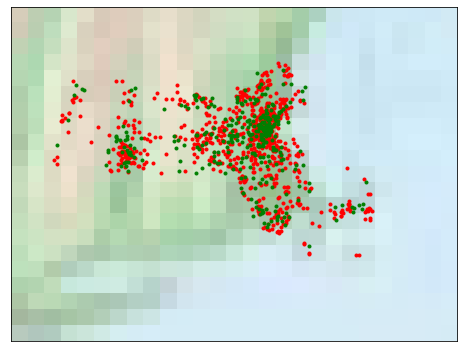

In [31]:
fig = plt.figure(figsize=(8, 12))
m = Basemap(projection='lcc', resolution=None,
            width=4E5, height=3E5, 
            lat_0=42, lon_0=-71.4325)

m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(non_lon    , non_lat)
p,q =m(adh_lon    , adh_lat)
plt.plot(x, y, 'ro', markersize=3)
plt.plot(p, q, 'go', markersize=3)
# plt.text(x, y, ' Seattle', fontsize=12);

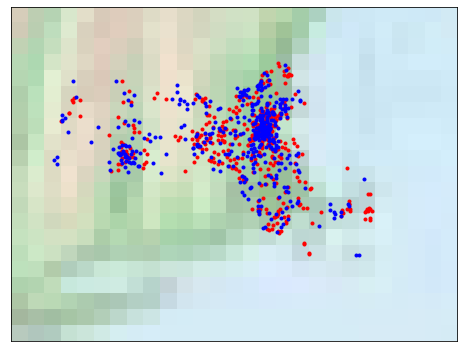

In [32]:
men_non_adh=non_adh[non_adh['GENDER']==1]
women_non_adh=non_adh[non_adh['GENDER']==0]
men_non_lat=men_non_adh['LAT'].values 
men_non_lon=men_non_adh['LON'].values
women_non_lat=women_non_adh['LAT'].values 
women_non_lon=women_non_adh['LON'].values

fig = plt.figure(figsize=(8, 12))
m = Basemap(projection='lcc', resolution=None,
            width=4E5, height=3E5, 
            lat_0=42, lon_0=-71.4325)

m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(men_non_lon    , men_non_lat)
p,q =m(women_non_lon    , women_non_lat)

plt.plot(x, y, 'ro', markersize=3)
plt.plot(p, q, 'bo', markersize=3)

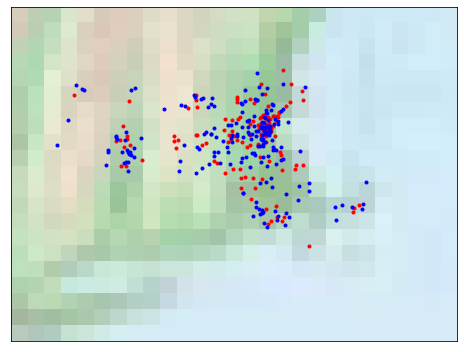

In [33]:
men_adh=adh[adh['GENDER']==1]
women_adh=adh[adh['GENDER']==0]
men_lat=men_adh['LAT'].values 
men_lon=men_adh['LON'].values
women_lat=women_adh['LAT'].values 
women_lon=women_adh['LON'].values

fig = plt.figure(figsize=(8, 12))
m = Basemap(projection='lcc', resolution=None,
            width=4E5, height=3E5, 
            lat_0=42, lon_0=-71.4325)

m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(men_lon    , men_lat)
p,q =m(women_lon    , women_lat)

plt.plot(x, y, 'ro', markersize=3)
plt.plot(p, q, 'bo', markersize=3)

In [34]:
def calculate_number(feature, cat_max) :
   Adh=[] 
   NonAdh=[] 
   for i in range(0,cat_max):
      t=patient_data[patient_data[feature]==i]
      total=len(t)
      nonadherence_race=len(t[t['ASSUMPTION'].str.contains('NONADHERENCE')])
      adherence_race=total-nonadherence_race
      NonAdh.append(nonadherence_race)
      Adh.append(adherence_race)
   return (Adh,NonAdh)

#use
# adh,nonadh=calculate_number('RACE', 5)
# adh,nonadh=calculate_number('GENDER', 2)

In [35]:

#fig, ax = plt.subplots()
#rects1 = ax.bar([1,2,3,4],Adh , width=0.35, label='Adherence')
#rects2 = ax.bar([1,2,3,4],NonAdh , width=0.35, label='NonAdherence')

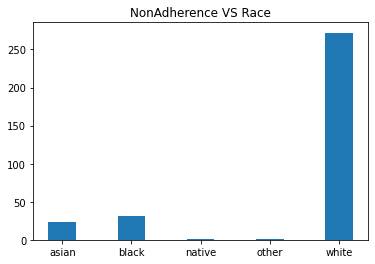

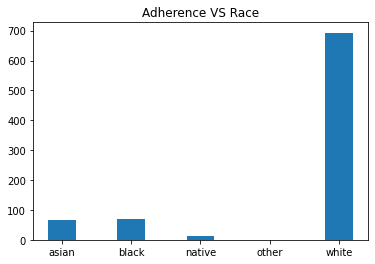

In [56]:
arr1,arr2=calculate_number('RACE', 5)
x, y = (['asian' , 'black' , 'native' , 'other' , 'white'] , arr1)
plt.bar(x, y , width=0.4)
plt.title('NonAdherence VS Race')
plt.show()
x, y = (['asian' , 'black' , 'native' , 'other' , 'white'] , arr2)
plt.bar(x, y , width=0.4  )
plt.title('Adherence VS Race')
plt.show()

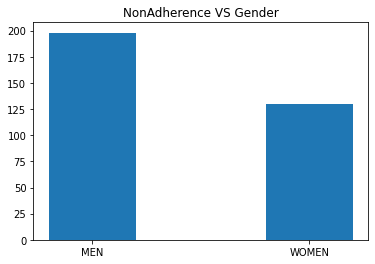

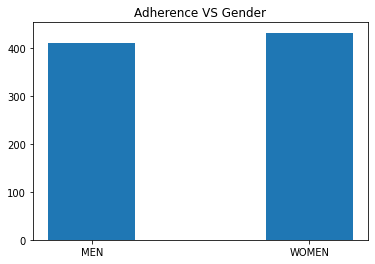

In [55]:
arr1,arr2=calculate_number('GENDER', 2)
x, y = (['MEN' , 'WOMEN' ] , arr1)
plt.bar(x, y , width=0.4)
plt.title('NonAdherence VS Gender')
plt.show()
x, y = (['MEN' , 'WOMEN'  ] , arr2)
plt.bar(x, y , width=0.4  )
plt.title('Adherence VS Gender')
plt.show()

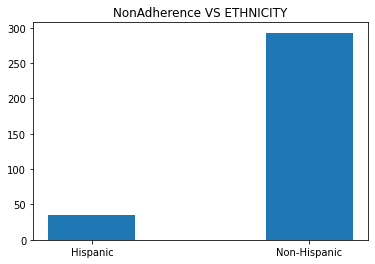

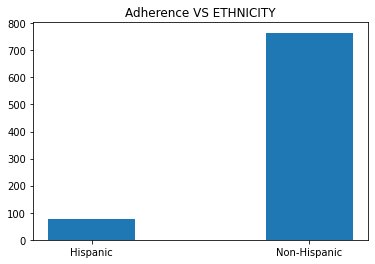

In [54]:
arr1,arr2=calculate_number('ETHNICITY', 2)
x, y = (['Hispanic' , 'Non-Hispanic' ] , arr1)
plt.bar(x, y , width=0.4)
plt.title('NonAdherence VS ETHNICITY')
plt.show()
x, y = (['Hispanic' , 'Non-Hispanic' ] , arr2)
plt.bar(x, y , width=0.4  )
plt.title('Adherence VS ETHNICITY')
plt.show()

[]

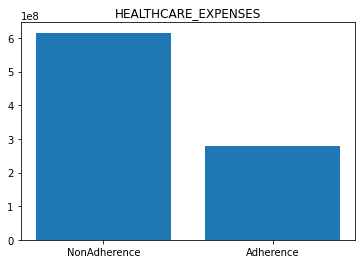

In [69]:
plt.bar(['NonAdherence','Adherence'],[non_adh['HEALTHCARE_EXPENSES'].sum(),adh['HEALTHCARE_EXPENSES'].sum()])
plt.title('HEALTHCARE_EXPENSES')
plt.plot()

[]

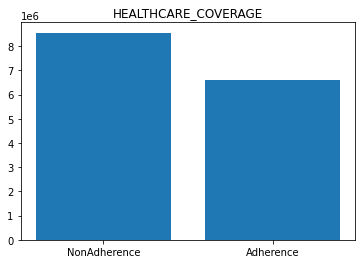

In [70]:
plt.bar(['NonAdherence','Adherence'],[non_adh['HEALTHCARE_COVERAGE'].sum(),adh['HEALTHCARE_COVERAGE'].sum()])
plt.title('HEALTHCARE_COVERAGE')
plt.plot()